# Students Performance in Exam
### Data source:
https://www.kaggle.com/datasets/shivamb/netflix-shows

#### Katarina Keishanti Joanne Kartakusuma - 21/472847/PA/20347
###### Machine Learning - CSA
---------------------------------------------------------

## Acquire data with Kaggle API

In [40]:
!kaggle datasets list -s "Netflix Movies and TV Shows"

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shivamb/netflix-shows                                           Netflix Movies and TV Shows                           1MB  2021-09-27 04:44:36         317403       7308  1.0              
victorsoeiro/netflix-tv-shows-and-movies                        Netflix TV Shows and Movies                           2MB  2022-07-26 19:50:06          26984        604  1.0              
senapatirajesh/netflix-tv-shows-and-movies                      Latest Netflix TV shows and movies                    1MB  2023-01-14 17:03:12           5103        128  0.9411765        
thedevastator/the-ultimate-netflix-tv-shows-and-movies-datas

In [41]:
!pip install --upgrade --force-reinstall --no-deps kaggle

  Using cached kaggle-1.5.13-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.13
    Uninstalling kaggle-1.5.13:
      Successfully uninstalled kaggle-1.5.13


In [42]:
!kaggle datasets download shivamb/netflix-shows

netflix-shows.zip: Skipping, found more recently modified local copy (use --force to force download)


## Import necessary libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [170]:
# Extract dataset

from zipfile import ZipFile
path = "/Users/katarinajoanne/University/UGM/2 - Second Year/Fourth Semester/Machine Learning/assignment-1/netflix-shows.zip"

with ZipFile(path, "r") as zip:
    zip.extractall()
    print("The dataset is extracted")

The dataset is extracted


## Load dataset to pandas

In [44]:
path = "netflix_titles.csv"
df = pd.read_csv(path)

In [45]:
# Display datafram head and tail
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [46]:
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [47]:
# Inspect data type
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [11]:
# Check whether the dataset contain null value or not
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Since the dataset contain null values, let's clean the data before processing it

## Clean the dataset

Populate major numbers, in this case 'director', 'cast', and 'country'.
Drop the minimum, 'date_added', 'rating', and 'duration'

The reason on why we're doing this is because if we drop a significant amount of columns, it will affect the analysis.

In [12]:
# Populate director, cast, and country
df["director"].fillna("Not Given", inplace = True)
df["cast"].fillna("Not Given", inplace = True)
df["country"].fillna("Not Given", inplace = True)

In [13]:
# Drop null values
df1 = df.dropna()

In [14]:
# Check whether the data is cleaned already
df1.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
# Drop irrelevant row; show_id, cast, description
df1 = df1.drop(labels=["show_id", "cast", "description"], axis=1)

In [16]:
# convert the date column to datetime format
df1["date_added"] = pd.to_datetime(df1["date_added"])

# extract the year from the datetime object
df1["year_added"] = df1["date_added"].dt.year

df1.drop(columns=["date_added"])

,type,title,director,country,release_year,rating,duration,listed_in,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,2021
1,TV Show,Blood & Water,Not Given,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021
2,TV Show,Ganglands,Julien Leclercq,Not Given,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
3,TV Show,Jailbirds New Orleans,Not Given,Not Given,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021
4,TV Show,Kota Factory,Not Given,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021
...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers",2019
8803,TV Show,Zombie Dumb,Not Given,Not Given,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",2019
8804,Movie,Zombieland,Ruben Fleischer,United States,2009,R,88 min,"Comedies, Horror Movies",2019
8805,Movie,Zoom,Peter Hewitt,United States,2006,PG,88 min,"Children & Family Movies, Comedies",2020


In [17]:
print(df1.dtypes)

type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
year_added               int64
dtype: object


## Statistical Methods

In [18]:
# mode of release year and rating
df1[["release_year", "rating", "country"]].mode()

,release_year,rating,country
0,2018,TV-MA,United States


In [19]:
df["release_year"].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [21]:
df1[df1['country'].notnull()].groupby('country').size().reset_index(name='counts')

,country,counts
0,", France, Algeria",1
1,", South Korea",1
2,Argentina,56
3,"Argentina, Brazil, France, Poland, Germany, De...",1
4,"Argentina, Chile",2
...,...,...
744,Venezuela,1
745,"Venezuela, Colombia",1
746,Vietnam,7
747,West Germany,1


Most of the columns in the dataset is non-numerical value. Thus, there's not much of statistical operation I could perform

## Visualization Method

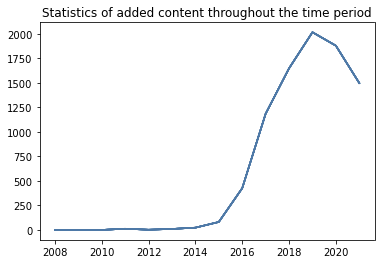

In [22]:
plt.title("Statistics of added content throughout the time period")
plt.plot(df1.groupby("year_added").count(), color="#4e79a7")
plt.show()

The line chart displays the growth of content added to Netflix between 2008 and 2021. The graph shows a steady trend until 2015, followed by a steep incline that peaked in 2019.

In the initial years from 2008 to 2014, the graph shows stability with the addition of content below 250. Subsequently, there was a significant rise starting from 2015, reaching in approximately 2000 new contents in 2019. After that, the content addition experienced a decline to around 1500 in 2021.

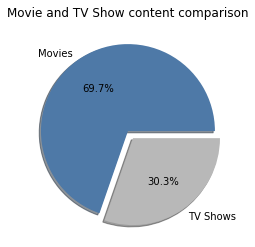

In [23]:
plt.title("Movie and TV Show content comparison")
plt.pie(df1["type"].value_counts(normalize=True),
    labels=("Movies", "TV Shows"),
    autopct="%1.1f%%",
    colors= ["#4e79a7", "#b8b8b8"],
    explode=[0,0.1],
    shadow=True,
    )
plt.show()

Based on the pie chart presented, it is evident that the most prevalent content type on the Netflix streaming platform is "Movie". The chart shows that "TV Show" content type comprises only around one third of the total, with an exact proportion of 30.3%. In contrast, "Movie" content type dominates the platform with a proportion of 69.7%.

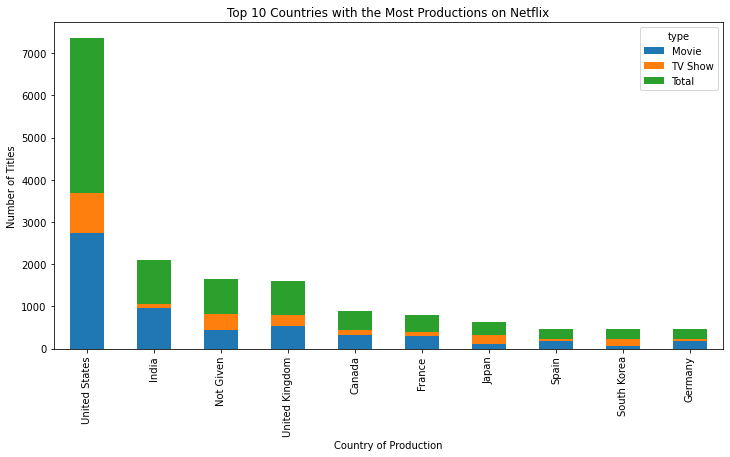

In [24]:
# Split countries separated by commas and remove leading/trailing spaces
df1['country'] = df1['country'].str.split(',').apply(lambda x: [i.strip() for i in x])

# Explode the country column so that each country gets a separate row
df1 = df1.explode('country')

# Count the number of movies and TV shows by country
production_counts = df1.groupby(['country', 'type']).size().unstack()

# Calculate the total number of productions by country
production_counts['Total'] = production_counts.sum(axis=1)

# Get the top 10 countries by total number of productions
top_countries = production_counts.nlargest(10, 'Total')

# Plot the bar chart
top_countries.plot(kind='bar', stacked=True, figsize=(12,6))

# Set the title and labels
plt.title('Top 10 Countries with the Most Productions on Netflix')
plt.xlabel('Country of Production')
plt.ylabel('Number of Titles')

# Show the chart
plt.show()

The provided bar chart illustrates a comparison of the ten countries with the highest number of productions on the popular streaming platform Netflix. The chart reveals that the United States occupies the first position in terms of the number of productions, following that is India. The third position, however, is "unknown production." The remaining countries listed in the chart are the United Kingdom, Canada, France, Japan, Spain, South Korea, and Germany, respectively.

Despite India securing the second position, there is a significant difference between the number of productions in India and the United States. The United States recorded around 7000 total productions, whereas India had only approximately 2000 productions available on Netflix.

It is interesting to note that while most countries on the chart produced more movies, South Korea and Japan displayed a distinct pattern with the majority of their productions being TV shows.

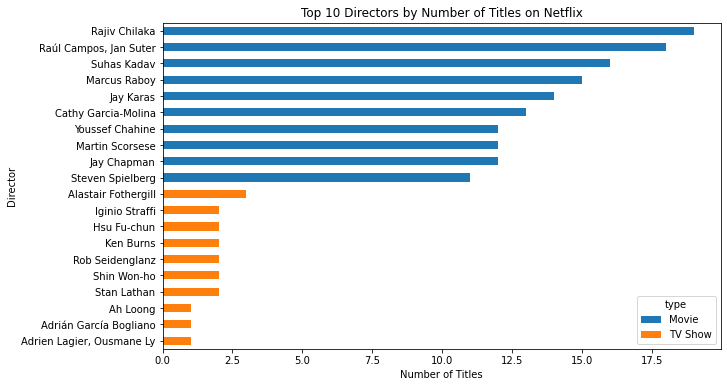

In [37]:
# Filter the dataset for TV shows and movies only, and remove rows with missing values in the director column
df = df[df['type'].isin(['TV Show', 'Movie'])]
df = df[df['director'].notna()]

# Filter out rows where the director is "Not Given"
df = df[df['director'] != 'Not Given']

# Create a new dataframe with the top 10 directors for each category based on the number of titles
top_directors = df.groupby(['type', 'director'])['title'].count().reset_index().sort_values(['type', 'title'], ascending=[True, False]).groupby('type').head(10)

# Pivot the table to create a stacked bar chart
pivot_table = top_directors.pivot(index='director', columns='type', values='title').fillna(0)

# Sort the pivot table by the total number of titles
pivot_table['total'] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values('total', ascending=True).drop('total', axis=1)

# Create the stacked bar chart
ax = pivot_table.plot(kind='barh', stacked=True, figsize=(10, 6))

# Set the chart title and axis labels
ax.set_title("Top 10 Directors by Number of Titles on Netflix")
ax.set_xlabel("Number of Titles")
ax.set_ylabel("Director")

# Display the chart
plt.show()

The presented graph depicts the top 10 directors on Netflix based on the number of titles they have directed. The dataset has been filtered to only include TV shows and movies, and rows with missing values in the director column have been removed. Additionally, any rows where the director is listed as "Not Given" have been excluded from the analysis.

The top three directors with the highest number of titles are shown in ascending order. For movies, the director with the most titles is Rajiv Chilaka, followed by Raul Campos with Jan Suter, and Suhas Kadav. In the TV show category, the top director is Alastair Fothergill, followed by Iginio Straffi and Hsu Fu-chun.

It is worth noting that the number of movies directed is significantly higher than the number of tv shows.

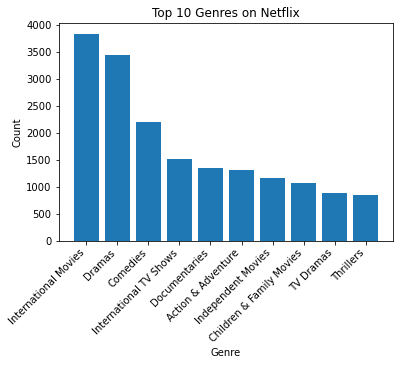

In [30]:
# Count the number of occurrences of each genre
genre_counts = df1['listed_in'].str.split(', ').explode().value_counts()

# Select the top 10 genres
top_genres = genre_counts[:10]

# Plot the bar chart
plt.bar(top_genres.index, top_genres.values)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

The bar chart illustrates the most popular genres/rating on Netflix, with the top three being International Movies, Dramas, and Comedies. 

International movies had the highest count of almost 4000, followed by dramas with nearly 3500. Comedies, despite being in third place, had a notable difference in count compared to the drama genre. The remaining genres had a relatively similar count of genres thereafter.

## Conclusion

The charts presented earlier reveal that Netflix experienced a decent growth in content addition, particularly from 2015 onwards. Movies were added more frequently than TV shows, which is understandable given that movies tend to have shorter runtimes. The ratings of the available content varied, with International Movies, Dramas, and Comedies being the most popular genres.

Although this dataset provides valuable information about what is available on Netflix, it falls short in providing deeper insights into the business side of the company. This is due to the lack of publicly available data from the customer perspective, such as which genres/ratings are most popular among viewers or the correlation between screen time and content type. Additionally, the limited numerical values in the dataset restrict our ability to perform detailed statistical visualizations and analyses. Therefore, it is difficult to develop a comprehensive analysis or provide suggestions for future improvements for Netflix based on this dataset alone.

However, if we want to assume, it is probably contents from the United States and International Movie ratings which had a significant impact for Netflix users since they are the top 1's.